**1. Fetch tweet data from February 1st to February 13th 2021**

In [75]:
import tweepy
import pandas as pd
import csv
from tweepy import Stream

#persiapan key

token_data = open('data_key.csv')
tokens = csv.reader(token_data, delimiter=',')

data_token = [row[2] for row in tokens]
consumer_key = data_token[0]
consumer_secret = data_token[1]
access_token = data_token[2]
access_token_secret = data_token[3]

#handler autentikasi
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#f = open('keywords.txt', 'r')
#search = f.read().splitlines()
#f.close()

numberoftweets = 3000

tweet_list = tweepy.Cursor(api.search, q= 'PSBB OR psbb OR #PSBB OR #psbb OR "Pembatasan Sosial Berskala Besar" OR "pembatasan sosial berskala besar" -filter:retweets', lang= 'id', since='2021-02-01', until ='2021-02-13', tweet_mode='extended').items(numberoftweets)
tweet_data = [[tweet.id, tweet.user.id, tweet.created_at, tweet.full_text, tweet.user.name, tweet.user.screen_name, tweet.user.location, tweet.user.created_at, tweet.user.followers_count
               , tweet.user.friends_count, tweet.user.verified ] for tweet in tweet_list]

tweet_data
tweet_df = pd.DataFrame(data=tweet_data, columns=['tweetid', "userid", "createddate", "tweet", "name", "screenname", "location", "accountcreated", "follower","friend", "verified"])
tweet_df



,tweetid,userid,createddate,tweet,name,screenname,location,accountcreated,follower,friend,verified
0,1360378130490249217,1404005396,2021-02-12 23:59:55,PSBB goblook ga jelaaaaaas!!!,Muh. Fauzan Fajri,JohnBlues66,Jakarta City,2013-05-05 03:38:07,239,698,False
1,1360378123229908992,175785800,2021-02-12 23:59:53,#InfoRaka Pemberlakuan PSBB Proposional Kota ...,IG : @RakaFMBandung,RakaFMBandung,Bandung West Java,2010-08-07 16:18:24,16243,4825,False
2,1360377006865608705,1274287293725982722,2021-02-12 23:55:27,@hakieeem @FatrasunuPS @tayanamiannn Maaf mas ...,Little Superman(a),junyeolii,,2020-06-20 10:25:53,3,54,False
3,1360375538217414658,88237073,2021-02-12 23:49:37,"Yang jadi soal adalah, masyarakat kita lihat k...",Mas Cep,mascepp,Indonesia,2009-11-07 18:07:01,926,678,False
4,1360375357723971589,1307643523743637506,2021-02-12 23:48:54,"@ReenTis_ Klo ini gak nyimak lagi,tp lsg sepak...",Urang Tasik 13,uusutari13,"Tasikmalaya, Jawa Barat",2020-09-20 11:31:37,1545,1029,False
...,...,...,...,...,...,...,...,...,...,...,...
2995,1358971248533860352,62464267,2021-02-09 02:49:28,Gubernur DKI Jakarta Anies Baswedan menyatakan...,TRANS7 CLUB,trans7club,Jakarta dan Indonesia Raya,2009-08-03 07:42:54,108885,177,False
2996,1358970956174163968,1709372942,2021-02-09 02:48:19,"Mandar mulai sabtu sampe minggu psbb total, ji...",Amanda Dey,amandaadey,,2013-08-29 07:08:39,534,238,False
2997,1358970897843900418,180375152,2021-02-09 02:48:05,PSBB --&gt; PSBB TRANSISI\n\nPPKM ---&gt; PPKM...,..,fannyiswardhana,BPP-JKT,2010-08-19 13:46:11,415,556,False
2998,1358970777991716866,1288884985550630914,2021-02-09 02:47:36,Psbb diperpanjang. Trus KKL nya kapan ??? 😩,Rahayu,Rahayu_rayy,"Jakarta Utara, DKI Jakarta",2020-07-30 17:11:50,21,28,False


In [76]:
#divide tweet data and user data
df_tweet_data = tweet_df.iloc[:,[0,1,2,3]]  
df_tweet_data

df_user_data = tweet_df.iloc[:,[1,4,5,6,7,8,9,10]]  

df_user_data

,userid,name,screenname,location,accountcreated,follower,friend,verified
0,1404005396,Muh. Fauzan Fajri,JohnBlues66,Jakarta City,2013-05-05 03:38:07,239,698,False
1,175785800,IG : @RakaFMBandung,RakaFMBandung,Bandung West Java,2010-08-07 16:18:24,16243,4825,False
2,1274287293725982722,Little Superman(a),junyeolii,,2020-06-20 10:25:53,3,54,False
3,88237073,Mas Cep,mascepp,Indonesia,2009-11-07 18:07:01,926,678,False
4,1307643523743637506,Urang Tasik 13,uusutari13,"Tasikmalaya, Jawa Barat",2020-09-20 11:31:37,1545,1029,False
...,...,...,...,...,...,...,...,...
2995,62464267,TRANS7 CLUB,trans7club,Jakarta dan Indonesia Raya,2009-08-03 07:42:54,108885,177,False
2996,1709372942,Amanda Dey,amandaadey,,2013-08-29 07:08:39,534,238,False
2997,180375152,..,fannyiswardhana,BPP-JKT,2010-08-19 13:46:11,415,556,False
2998,1288884985550630914,Rahayu,Rahayu_rayy,"Jakarta Utara, DKI Jakarta",2020-07-30 17:11:50,21,28,False


In [77]:
#drop duplicate for user data
df_user_data = df_user_data.drop_duplicates(subset=['userid'])

In [ ]:
#view new user data dataframe
df_user_data

In [79]:
#import library nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
pip install sastrawi

**2. Clean Tweet Data**

In [ ]:
#clean tweet data

import string
import tweepy
import pandas as pd
import csv
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import tweepy
import pandas as pd
import csv
import re

stopwords = set(stopwords.words('indonesian'))
data_list = df_tweet_data['tweet'].values.tolist()

data_list_new = []
for tweet in data_list:
  #data_list_nw = []
  tweet = tweet.translate(str.maketrans("","",string.punctuation)) #menghilangkan tanda baca
  tweet = tweet.lower() #membuat text menjadi lower case
  #tweet = re.sub(r"\d+", "", tweet) #menghilangkan angka
  tweet = tweet.strip() #menghilangkan whitespace
  tweet = tweet.split() #split words
  tweet = [word for word in tweet if word not in stopwords]#menghilangkan stopwords
  tweet_new = ' '.join(tweet) #join new words without stopwords
  data_list_new.append(tweet_new)


df_clean_tweet = pd.DataFrame(data_list_new, columns=['cleantweet'])
df_clean_tweet

In [82]:
#merge clean tweet
df_tweet_data_new = pd.concat([df_tweet_data, df_clean_tweet], axis=1)
df_tweet_data_new

,tweetid,userid,createddate,tweet,cleantweet
0,1360378130490249217,1404005396,2021-02-12 23:59:55,PSBB goblook ga jelaaaaaas!!!,psbb goblook ga jelaaaaaas
1,1360378123229908992,175785800,2021-02-12 23:59:53,#InfoRaka Pemberlakuan PSBB Proposional Kota ...,inforaka pemberlakuan psbb proposional kota ba...
2,1360377006865608705,1274287293725982722,2021-02-12 23:55:27,@hakieeem @FatrasunuPS @tayanamiannn Maaf mas ...,hakieeem fatrasunups tayanamiannn maaf mas ya ...
3,1360375538217414658,88237073,2021-02-12 23:49:37,"Yang jadi soal adalah, masyarakat kita lihat k...",masyarakat lihat kabar buruk cuek buruk dikaba...
4,1360375357723971589,1307643523743637506,2021-02-12 23:48:54,"@ReenTis_ Klo ini gak nyimak lagi,tp lsg sepak...",reentis klo gak nyimak lagitp lsg sepakatcoba ...
...,...,...,...,...,...
2995,1358971248533860352,62464267,2021-02-09 02:49:28,Gubernur DKI Jakarta Anies Baswedan menyatakan...,gubernur dki jakarta anies baswedan memperpanj...
2996,1358970956174163968,1709372942,2021-02-09 02:48:19,"Mandar mulai sabtu sampe minggu psbb total, ji...",mandar sabtu sampe minggu psbb total jingan kh...
2997,1358970897843900418,180375152,2021-02-09 02:48:05,PSBB --&gt; PSBB TRANSISI\n\nPPKM ---&gt; PPKM...,psbb gt psbb transisi ppkm gt ppkm berskala mi...
2998,1358970777991716866,1288884985550630914,2021-02-09 02:47:36,Psbb diperpanjang. Trus KKL nya kapan ??? 😩,psbb diperpanjang trus kkl nya 😩


In [83]:
df_tweet_data_new.to_csv('df_tweet_data.csv', index=False)

In [84]:
df_user_data.to_csv('df_user_data.csv', index=False)

## **3. create wordcloud**

In [ ]:
cleantweet_list = df_tweet_data_new['cleantweet'].values.tolist()
cleantweet_list

In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
#import library
import itertools
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


data_list_new = [word_tokenize(paragraf) for paragraf in cleantweet_list] #divide data per word
data_list_new_2 = list(itertools.chain(*data_list_new)) #gather data into one list


fqdist = FreqDist(data_list_new_2) #calculate frequency per words
print(fqdist.most_common(10)) #display top 10 most appear words

[('psbb', 2900), ('ppkm', 510), ('yg', 469), ('ga', 406), ('ya', 332), ('aja', 255), ('gak', 244), ('lockdown', 207), ('pemerintah', 200), ('pembatasan', 184)]


In [89]:
pip install wordcloud #install wordcloud

In [90]:
from wordcloud import WordCloud #import library
import matplotlib.pyplot as plt

data_list_new_3 = ' '.join(data_list_new_2) #join new data list
print(data_list_new_3) #print new data list

psbb goblook ga jelaaaaaas inforaka pemberlakuan psbb proposional kota bandung rangka pencegahan pengendalian covid19 berlaku 9 25 februari 2021 halhal dipatuhi httpstcorgyqgtooh0 hakieeem fatrasunups tayanamiannn maaf mas ya gak kulaih jd gak tau lihat wali mahasiswa kerja keras dicegat2i aturan psbb trus anak tbtb uang bayar ukt dimasa pandemi mreka stidaknya brjuang org tua mreka masyarakat lihat kabar buruk cuek buruk dikabarkan pemerintah pengin masyarakat sadar peduli buktinya psbb ppkm apapun namanya regulasi perjalanan dll reentis klo gak nyimak lagitp lsg sepakatcoba lsg lockdownatau minimal psbb nya yg ketatmungkin gak kaya skrg kompascom cie cie yg bangga ga macet psbb 😂 psbb proporsionial kota bandung kafe restoran kota bandung buka 2100 kapasitas 50 senyumpagi semangat menyambut pagi jam 69 pagi w diaryjeanmarlon on air on 988 raka fm bandung httpstcoj8xqxmpuye buzzerp kayaknya kecuali menghentikan psbb pskm ga merugikan rakyat isu dikeluarkan radikal radikul dll tolonglah

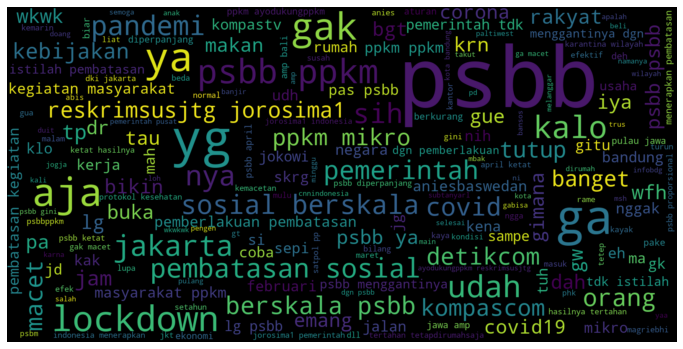

In [91]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data_list_new_3) #create wordcloud visualization
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **4. Sentiment analysis**

In [ ]:
#get clean tweet 
df_cleantweet = pd.DataFrame(df_tweet_data_new[{'tweetid','cleantweet'}])
df_cleantweet.head(5)

In [ ]:
cleantweet_list = df_tweet_data_new['cleantweet'].values.tolist()
cleantweet_list

In [92]:
  pos_list= open("./kata_positif.txt","r")
  pos_kata = pos_list.readlines()
  neg_list= open("./kata_negatif.txt","r")
  neg_kata = neg_list.readlines()

In [ ]:
score = []
for item in cleantweet_list:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item:
              count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item:
              count_n +=1
    score.append(count_p - count_n)

score

#Total Nilai > 0, maka sentimen positif
#Total Nilai < 0, maka sentimen negatif
#Total Nilai = 0, maka sentimen netral

In [ ]:
df_score = pd.DataFrame(score, columns=['score'])
df_score

In [ ]:
df_score['Labels'] = ['Negative' if x < 0 else 'Positive' if x > 0 else 'Neutral' for x in df_score['score']]
df_score

In [96]:
df_sentiment = pd.DataFrame(df_tweet_data_new['tweetid'])
df_sentiment['sentiment'] = df_score['Labels']
df_sentiment

,tweetid,sentiment
0,1360378130490249217,Positive
1,1360378123229908992,Positive
2,1360377006865608705,Neutral
3,1360375538217414658,Positive
4,1360375357723971589,Negative
...,...,...
2995,1358971248533860352,Neutral
2996,1358970956174163968,Neutral
2997,1358970897843900418,Neutral
2998,1358970777991716866,Neutral


In [97]:
#save sentiment to csv file
df_sentiment.to_csv('df_sentiment.csv', index=False)

# **5. Visualization**

In [99]:
#count sentiment 
def count_values_in_column(datas,features):
  total=datas.loc[:,features].value_counts()
  percentage=round(datas.loc[:,features].value_counts(normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
df_count = count_values_in_column(df_sentiment,'sentiment')
df_count = df_count.rename_axis("Sentiment Label", axis = 'columns')
df_count

Sentiment Label,Total,Percentage
Neutral,1219,40.63
Negative,1099,36.63
Positive,682,22.73


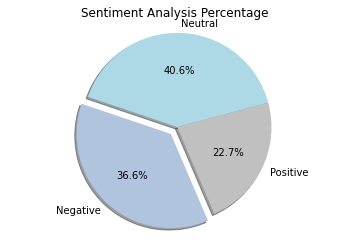

In [101]:
import matplotlib.pyplot as plt

#visualize sentiment pie chart
my_labels = 'Neutral','Negative','Positive'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plt.pie(df_count['Percentage'], labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Sentiment Analysis Percentage')
plt.axis('equal')
plt.show()

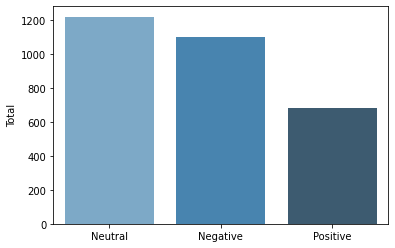

In [102]:
#visualize sentiment bar chart
import seaborn as sns

ax = sns.barplot(x=df_count.index, y="Total", data=df_count, palette="Blues_d")

# **6. Save Data to SQL**

In [104]:
#save data to db sql
import sqlite3

from sqlalchemy import create_engine
engine = create_engine('sqlite:///simple_sentiment_analysis.db', echo=False)
df_user_data.to_sql('User', if_exists = 'append', con=engine, index=False, chunksize = 1000)

In [105]:
df_tweet_data_new.to_sql('Tweet', if_exists = 'append', con=engine, index=False, chunksize = 1000)

In [106]:
df_sentiment.to_sql('Sentiment', if_exists = 'append', con=engine, index=False, chunksize = 1000)

# **7. Additional Analysis**

In [108]:
#count sentiment by date
import sqlite3
import pandas as pd

connection = sqlite3.connect('/content/simple_sentiment_analysis.db')
crud_query = 'select strftime("%d-%m-%Y", t.createddate) Day, s.sentiment sentiment_type, count(s.sentiment) count_sentiment from Sentiment s inner join Tweet t on s.tweetid = t.tweetid group by Day, sentiment_type'

cursor = connection.cursor()
cursor.execute(crud_query)

rows = cursor.fetchall()
my_df = pd.DataFrame(rows)
my_df
my_df = my_df.rename(columns={0 : 'date', 1 : 'sentiment_type', 2: 'total_sentiment' })
my_df


,date,sentiment_type,total_sentiment
0,09-02-2021,Negative,454
1,09-02-2021,Neutral,453
2,09-02-2021,Positive,254
3,10-02-2021,Negative,271
4,10-02-2021,Neutral,312
5,10-02-2021,Positive,171
6,11-02-2021,Negative,200
7,11-02-2021,Neutral,269
8,11-02-2021,Positive,149
9,12-02-2021,Negative,174


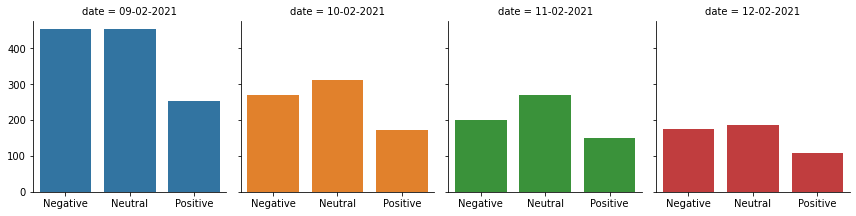

In [109]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

g = sns.FacetGrid(my_df, col="date", hue = 'date', col_wrap=4)
g.map_dataframe(sns.barplot, x='sentiment_type', y='total_sentiment')
 
plt.subplots_adjust(top=0.92)
 
plt.show()
g = g.set_titles("{col_name}")


In [110]:
#count verified and not verified account 

import sqlite3
import pandas as pd

connection = sqlite3.connect('/content/simple_sentiment_analysis.db')
crud_query = 'select verified, count(verified) count_verified from User group by verified'

cursor = connection.cursor()
cursor.execute(crud_query)

rows = cursor.fetchall()
my_df_verified = pd.DataFrame(rows)
my_df_verified
my_df_verified = my_df_verified.rename(columns={0 : 'Verified Type', 1 : 'Total'})
my_df_verified



,Verified Type,Total
0,0,2519
1,1,37


In [111]:
my_df_verified['Verified Status'] = ['Verified' if x == '1'  else 'Not Verified' for x in my_df_verified['Verified Type']]
my_df_verified

,Verified Type,Total,Verified Status
0,0,2519,Not Verified
1,1,37,Verified


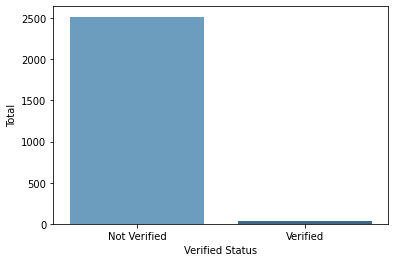

In [112]:
import seaborn as sns

ax = sns.barplot(x='Verified Status', y="Total", data=my_df_verified, palette="Blues_d")

In [113]:
#sentiment by user verified status

import sqlite3
import pandas as pd

connection = sqlite3.connect('/content/simple_sentiment_analysis.db')
crud_query = 'select u.verified, s.sentiment sentiment_type, count(u.verified) count_verified from Sentiment s inner join Tweet t on s.tweetid = t.tweetid inner join User u on u.userid = t.userid group by sentiment_type, u.verified order by verified'

cursor = connection.cursor()
cursor.execute(crud_query)

rows = cursor.fetchall()
my_df_user_verified = pd.DataFrame(rows)
my_df_user_verified
my_df_user_verified = my_df_user_verified.rename(columns={0 : 'Verified_Type', 1 : 'Sentiment Type', 2: 'Count'})
my_df_user_verified



,Verified_Type,Sentiment Type,Count
0,0,Negative,1066
1,0,Neutral,1205
2,0,Positive,647
3,1,Negative,33
4,1,Neutral,14
5,1,Positive,35


In [114]:
my_df_user_verified['Verified Status'] = ['Verified' if x == '1'  else 'Not Verified' for x in my_df_user_verified['Verified_Type']]
my_df_user_verified = my_df_user_verified[['Verified_Type','Verified Status', 'Sentiment Type', 'Count']]
my_df_user_verified

,Verified_Type,Verified Status,Sentiment Type,Count
0,0,Not Verified,Negative,1066
1,0,Not Verified,Neutral,1205
2,0,Not Verified,Positive,647
3,1,Verified,Negative,33
4,1,Verified,Neutral,14
5,1,Verified,Positive,35


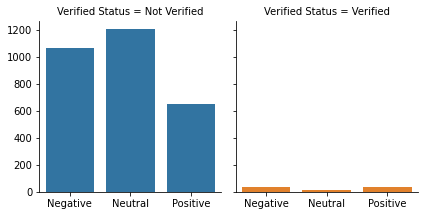

In [115]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

g = sns.FacetGrid(my_df_user_verified, col="Verified Status", hue = 'Verified Status', col_wrap=2)
g.map_dataframe(sns.barplot, x='Sentiment Type', y='Count')
 
plt.subplots_adjust(top=0.92)
 
plt.show()
g = g.set_titles("{col_name}")